In [1]:
from src.model import ResNet50Model
from src.train import train_model
from src.load_data import load_and_preprocess_data, prepare_train_test_data
from src.evaluate import evaluate_model

c:\Users\asman\anaconda3\envs\myenv\lib\site-packages\requests\__init__.py:104: RequestsDependencyWarning: urllib3 (1.26.18) or chardet (5.0.0)/charset_normalizer (2.0.12) doesn't match a supported version!
  RequestsDependencyWarning)


In [2]:
resnet = ResNet50Model(input_shape=(100, 100, 3), num_classes=5)
resnet.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 100, 100, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 106, 106, 3)  0           input_1[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 50, 50, 64)   9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 50, 50, 64)   256         conv1_conv[0][0]                 
______________________________________________________________________________________________

In [3]:
resnet.compile_model()

In [ ]:
base_path = 'Database'
dataset_folder = 'train'  
image_size = 100  
image_data, label_data, label_names = load_and_preprocess_data(base_path, dataset_folder, image_size=image_size)

Loading MCI: 100%|██████████| 8002/8002 [02:47<00:00, 47.64it/s] 


In [5]:
image_data.shape

(40077, 100, 100, 3)

In [6]:
test_size = 0.2  # 20% of data will be used for testing
random_state = 42 
X_train, X_test, Y_train, Y_test, label_names = prepare_train_test_data(image_data, label_data, test_size=test_size, random_state=random_state)

In [7]:
model_name = 'resnet50'
history = train_model(resnet,X_train, Y_train, X_test, Y_test,model_name)

Epoch 1/50
3207/3207 [==============================] - 53s 14ms/step - loss: 2.9788 - auc: 0.8726 - val_loss: 1.4693 - val_auc: 0.9383


c:\Users\asman\anaconda3\envs\myenv\lib\site-packages\keras\utils\generic_utils.py:497: CustomMaskWarning: Custom mask layers require a config and must override get_config. When loading, the custom mask layer must be passed to the custom_objects argument.
  category=CustomMaskWarning)


Epoch 2/50
3207/3207 [==============================] - 44s 14ms/step - loss: 2.0195 - auc: 0.9242 - val_loss: 2.6767 - val_auc: 0.9220
Epoch 3/50
3207/3207 [==============================] - 44s 14ms/step - loss: 1.6096 - auc: 0.9430 - val_loss: 1.6343 - val_auc: 0.9436
Epoch 4/50
3207/3207 [==============================] - 44s 14ms/step - loss: 1.4695 - auc: 0.9504 - val_loss: 1.9104 - val_auc: 0.9405
Epoch 5/50
3207/3207 [==============================] - 44s 14ms/step - loss: 1.3423 - auc: 0.9565 - val_loss: 2.0929 - val_auc: 0.9450
Epoch 6/50
3207/3207 [==============================] - 46s 14ms/step - loss: 1.2812 - auc: 0.9608 - val_loss: 1.7290 - val_auc: 0.9502
Epoch 7/50
3207/3207 [==============================] - 46s 14ms/step - loss: 1.1817 - auc: 0.9645 - val_loss: 2.3580 - val_auc: 0.9357
Epoch 8/50
3207/3207 [==============================] - 48s 15ms/step - loss: 1.1368 - auc: 0.9666 - val_loss: 1.3325 - val_auc: 0.9662
Epoch 9/50
3207/3207 [==========================

In [8]:
loss, accuracy = resnet.evaluate(X_train, Y_train)
print("Train Loss: ", loss)
print("Train Accuracy: ", accuracy)

1002/1002 [==============================] - 24s 23ms/step - loss: 0.3525 - auc: 0.9882
Train Loss:  0.35253769159317017
Train Accuracy:  0.9882297515869141


In [9]:
loss, accuracy = resnet.evaluate(X_test, Y_test)
print("Test Loss: ", loss)
print("Test Accuracy: ", accuracy)

251/251 [==============================] - 6s 24ms/step - loss: 1.3325 - auc: 0.9662
Test Loss:  1.3325042724609375
Test Accuracy:  0.9662351608276367


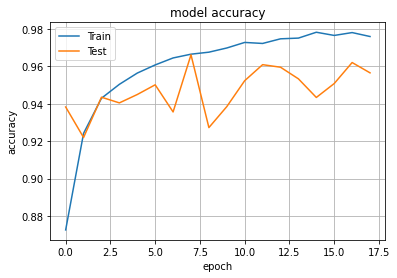

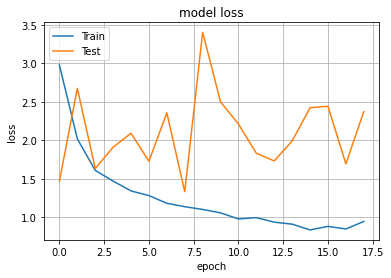

In [10]:
import matplotlib.pyplot as plt

# summarize history for accuracy
plt.plot(history.history['auc'])
plt.plot(history.history['val_auc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()
# summarize history for loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Test'], loc='upper left')
plt.grid()
plt.show()


              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1653
           1       0.96      0.97      0.97      1612
           2       0.86      0.92      0.89      1588
           3       0.91      0.86      0.88      1552
           4       0.97      0.93      0.95      1611

    accuracy                           0.93      8016
   macro avg       0.93      0.93      0.93      8016
weighted avg       0.93      0.93      0.93      8016



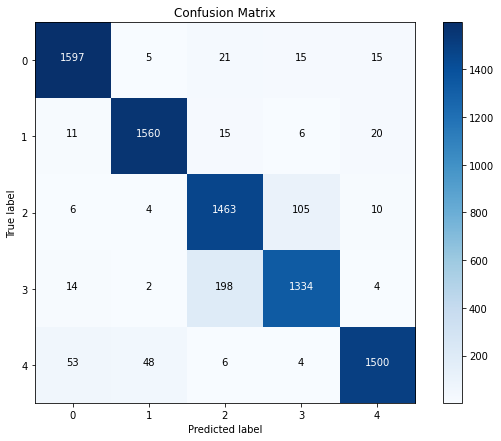

In [11]:
evaluate_model(resnet, X_test, Y_test)